In [1]:
# Data Manipulation Libraries
import pandas as pd

# Data Visualization Libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Mechine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Others 
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Social_Network_Ads.csv")
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


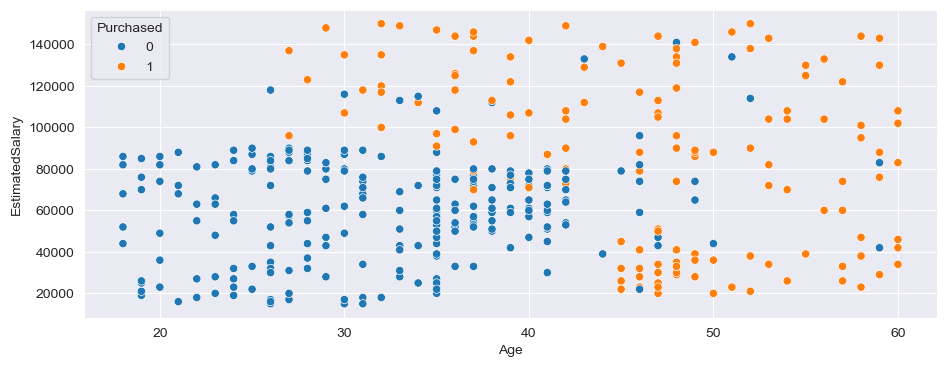

In [3]:
plt.figure(figsize=(11,4))
sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue='Purchased')
plt.show()

# Best Model Selection

Best Model: Random Forest
Best F1 Score: 0.8667


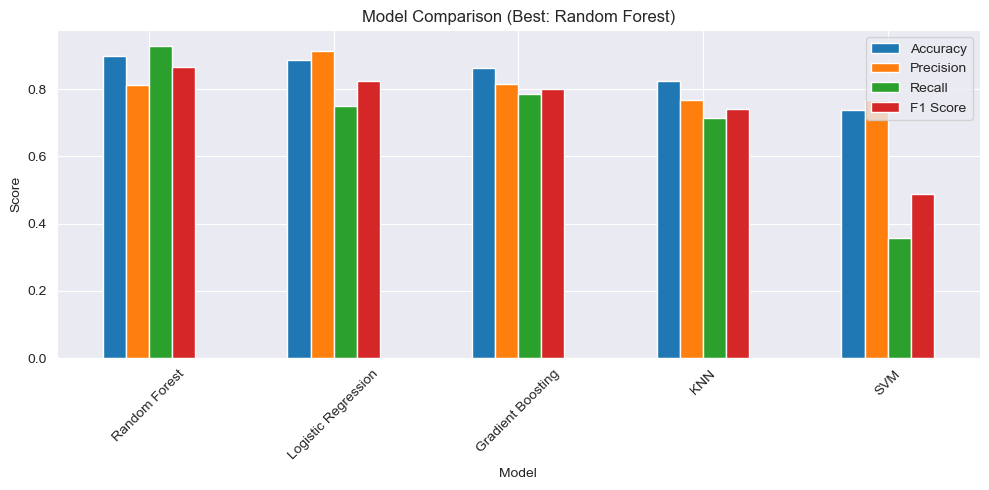

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.9000,0.812500,0.928571,0.866667
Logistic Regression,0.8875,0.913043,0.750000,0.823529
Gradient Boosting,0.8625,0.814815,0.785714,0.800000
KNN,0.8250,0.769231,0.714286,0.740741
SVM,0.7375,0.769231,0.357143,0.487805


In [29]:
# ==============================
# STEP 1: Import Libraries
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import pandas as pd

# ==============================
# STEP 2: Encode Target Column
# ==============================
encoder = LabelEncoder()
df['Purchased'] = encoder.fit_transform(df['Purchased'])

# ==============================
# STEP 3: Features & Target
# ==============================
X = df.drop(columns='Purchased')
y = df['Purchased']

# ==============================
# STEP 4: Train–Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# STEP 5: Models
# ==============================
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# ==============================
# STEP 6: Train & Evaluate
# ==============================
model_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1 Score': f1_score(y_test, y_pred, pos_label=1)
    }

# ==============================
# STEP 7: Results DataFrame (SORTED)
# ==============================
results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values(by='F1 Score', ascending=False)

# ==============================
# STEP 8: AUTO-DETECT BEST MODEL
# ==============================
best_model_name = results_df.index[0]
best_f1_score = results_df.iloc[0]['F1 Score']

print(f"Best Model: {best_model_name}")
print(f"Best F1 Score: {best_f1_score:.4f}")

# ==============================
# STEP 9: Plot (Best Model Highlighted)
# ==============================
results_df.plot(
    kind='bar',
    figsize=(10, 5)
)

plt.title(f'Model Comparison (Best: {best_model_name})')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================
# STEP 10: Display Results
# ==============================
results_df


In [6]:
x = df.drop(columns='Purchased')
y = df['Purchased']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Successfully completed.")

Successfully completed.


In [8]:
lor = LogisticRegression()
lor.fit(x_train, y_train)

LogisticRegression()

In [9]:
print(f"Model Accuracy: {lor.score(x_test, y_test)*100: .2f}%")

Model Accuracy:  88.75%


In [10]:
lor.predict([[19, 19000]])

array([0], dtype=int64)

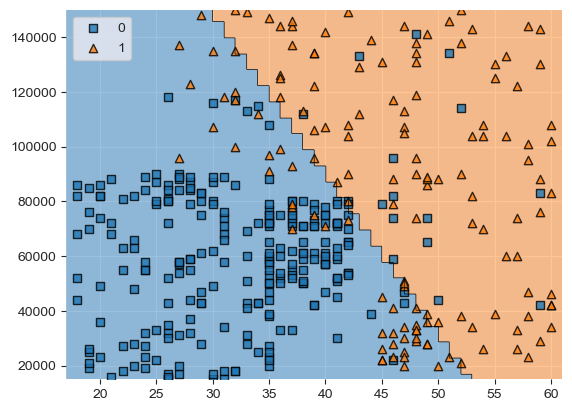

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lor)
plt.legend()
plt.show()

# LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
print(f"Model Accuracy: {lr.score(x_test, y_test)*100: .2f}%")

Model Accuracy:  56.35%


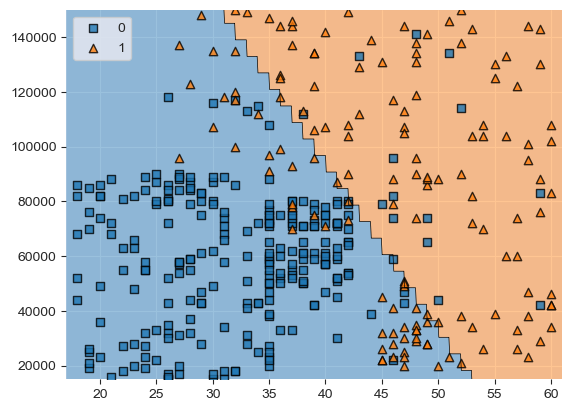

In [43]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr) # lr= LinearRegression()
plt.legend()
plt.show()